<a href="https://colab.research.google.com/github/shubhamkumar0105/Data_Analyst_Project/blob/main/myPythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
upload= files.upload()

Saving customer_shopping_data.csv to customer_shopping_data.csv


In [12]:
import pandas as pd

# Loading the dataset
file_path = 'customer_shopping_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(20)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [13]:
count=pd.isnull(df).sum()
count

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [15]:
# use describe() for specific columns
df[['gender', 'age', 'shopping_mall']].describe()

,age
count,99457.000000
mean,43.427089
std,14.990054
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


In [16]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

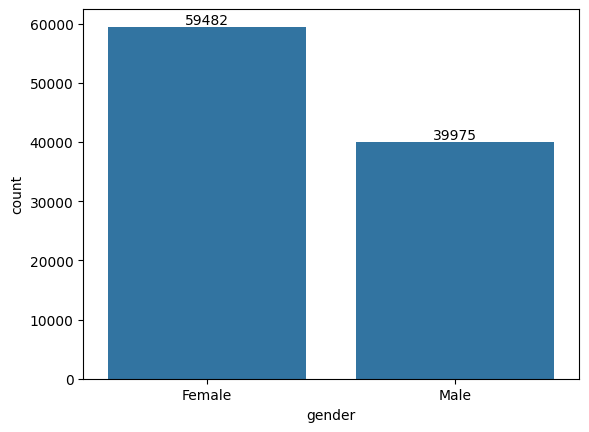

In [19]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

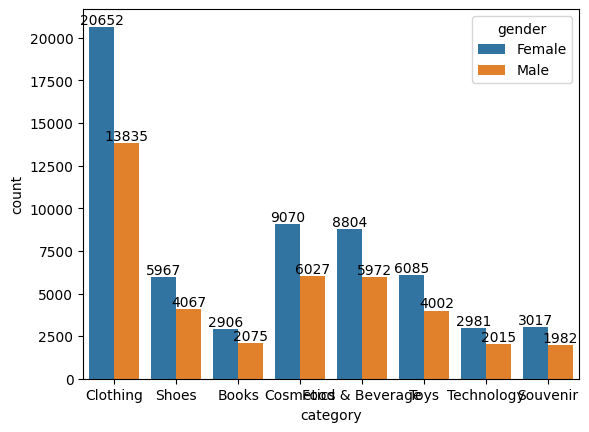

In [23]:
ax = sns.countplot(data = df, x = 'category', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can say that women are purchasing more producs than men in each category


In [22]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

<Axes: xlabel='shopping_mall', ylabel='quantity'>

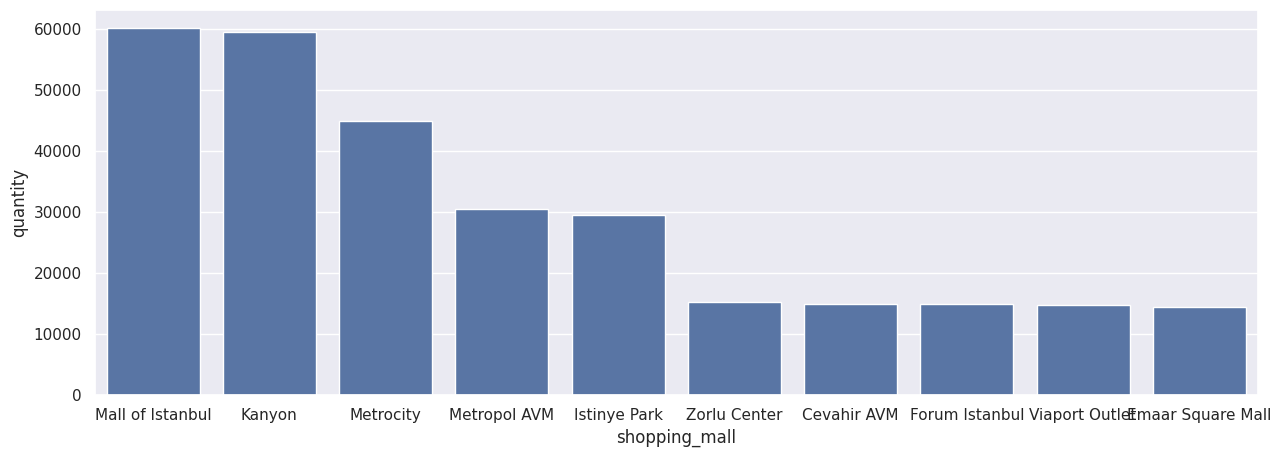

In [26]:
# total number of orders from top 10 states

sales_state = df.groupby(['shopping_mall'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'shopping_mall',y= 'quantity')

From the above graph we can conclude that the mall of Istanbul and kanyon has maximum sales.


<Axes: xlabel='shopping_mall', ylabel='price'>

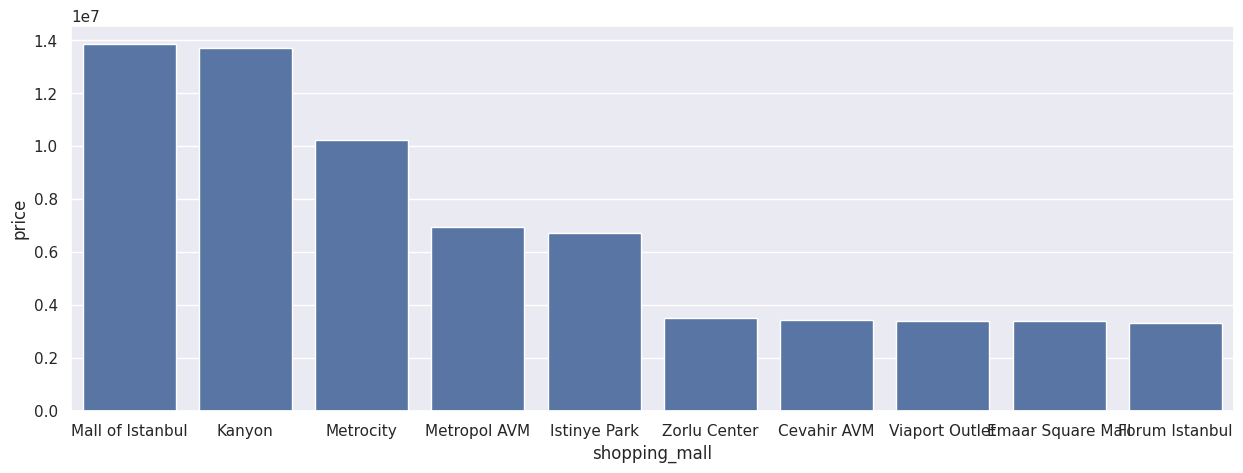

In [27]:
# total amount/sales from top 10 states

sales_state = df.groupby(['shopping_mall'], as_index=False)['price'].sum().sort_values(by='price', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'shopping_mall',y= 'price')

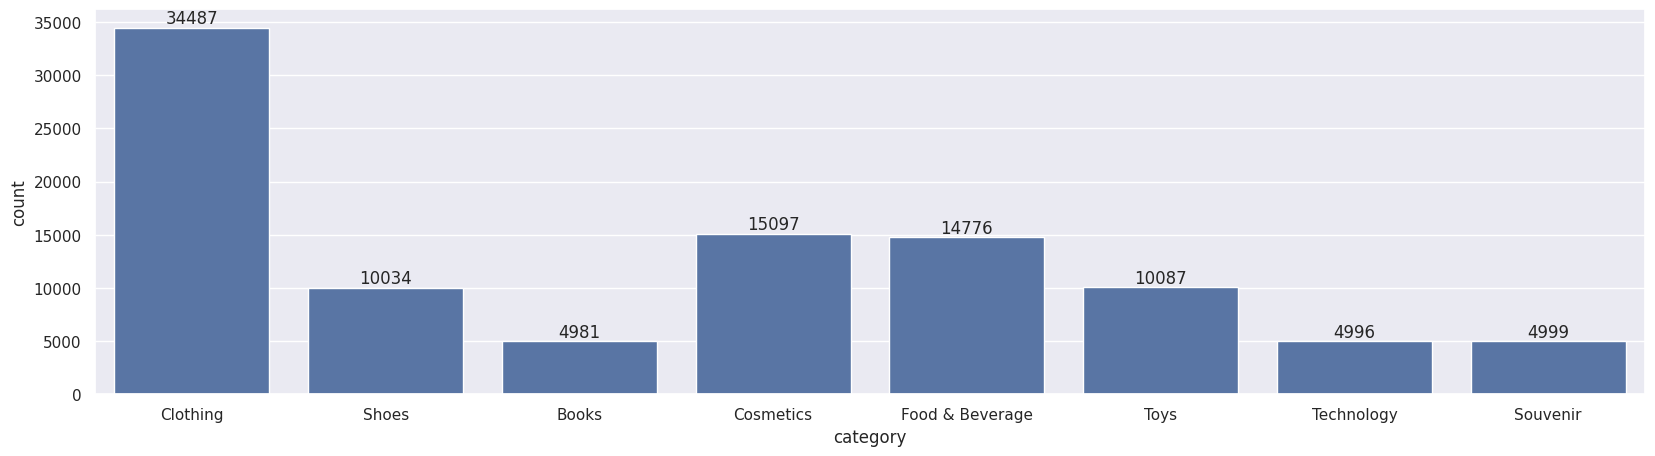

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'category')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
Most of the people shopped in clothing category



<Axes: xlabel='customer_id'>

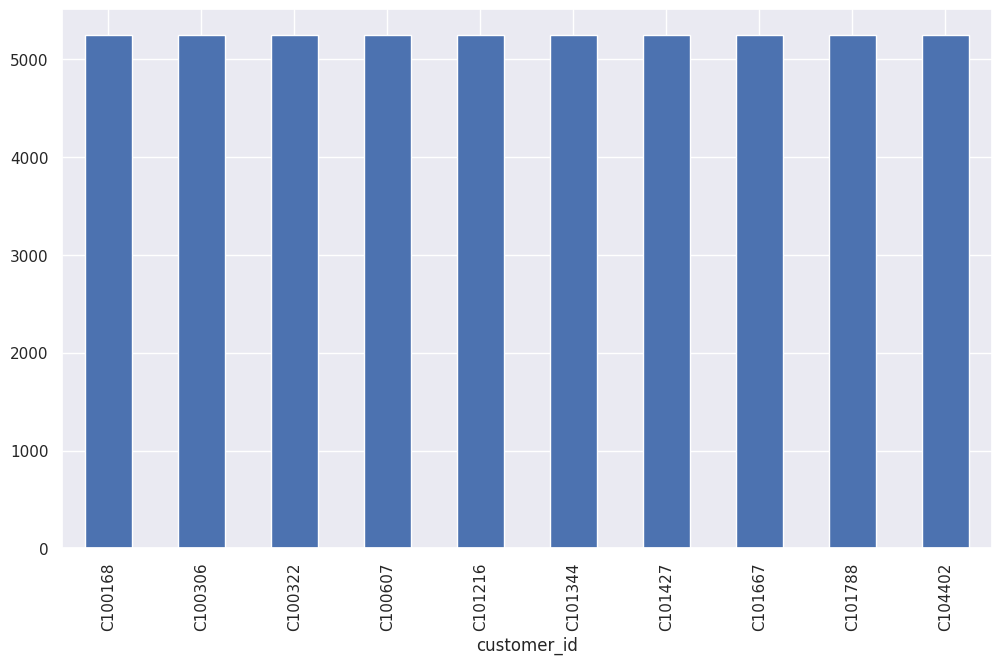

In [39]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('customer_id')['price'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')